In [118]:
#import get to call a get request on the site
import requests

#import to manipulate arrays with numpy
import numpy as np

#import to create, clean, and parse data frames with pandas
import pandas as pd

#import to enable datascraping
from bs4 import BeautifulSoup

#import to set up 'sleep' to wait between page loads
import time

import timeit

# import Mongo so our webscraper dumps its scraped data without losing it
from pymongo import MongoClient
import pymongo

#import to make that html readable
import pprint

#import regular expressions operations
import re

#import to get the universe in balance
import random


from dateutil.parser import parse

#import so we can do some heavy stats work
import scipy as sp
from scipy.stats import binom
import scipy.stats as stats

#import to access certain plotting features
import seaborn as sns

#import because we need its program functions
import math

from sklearn import neighbors, datasets, tree, metrics, svm, preprocessing, utils
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import log_loss, classification_report, confusion_matrix

#import because we need to plot and make it pretty
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
%matplotlib inline
plt.style.use('ggplot')

In [4]:
def motorcycle_post_parser(total_listings):
    client = MongoClient('localhost', 27017)
    db = client['craigslist_motorcycles']
    post_html = db['motorcycle_posts'].find()[0:total_listings]
    
    title = []
    year = []
    price = []
    neighborhood = []
    description = []
    url = []
    #attributes
    model = []
    vin = []
    condition = []
    cryptocurrency = []
    delivery = []
    engine_size = []
    fuel_type = []
    mileage = []
    paint_color = []
    street_legal = []
    title_status = []
    transmission = []
    bike_type = []

    iterations = 0
    print('Starting Parsing')
    print(' ')
    for _ in post_html:         
        
        # attributes key words to parse through attributes
        vin_ = 'VIN:'
        condition_ = 'condition:'
        cryptocurrency_ = 'cryptocurrency'
        delivery_ = 'delivery'
        engine_size_ = 'engine displacement'
        fuel_type_ = 'fuel:'
        mileage_ = 'odometer:'
        paint_color_ = 'paint color:'
        street_legal_ = 'street legal'
        title_status_ = 'title status:'
        transmission_ = 'transmission:'
        bike_type_ = 'type:'  
        
        response = _['html']
        soup = BeautifulSoup(response, 'html.parser')

        try:
            post_title = soup.find('span', id = 'titletextonly')
            title.append(post_title.text)
        except:
            title.append(np.nan)
            
        try:
            post_price = soup.find('span', class_ = 'price').text
            price.append(float(post_price.lstrip('$')))
        except:
            price.append(np.nan)
        
        try:
            post_neighborhood = soup.find('small')
            neighborhood.append(((post_neighborhood.text).replace(' (', '')).replace(')', ''))
        except:
            neighborhood.append(np.nan)
        
        try:
            post_description = soup.find('section', id = 'postingbody')
            description.append((post_description.text).replace('\n\nQR Code Link to This Post\n\n\n', ''))
        except:
            description.append(np.nan)
        
        try:
            year_ = parse(post_title.text, fuzzy=True).year
            if 1920 < year_ < 2020:
                year.append(year_)
            else:
                year.append(np.nan)
        except:
            year.append(np.nan)
        
        url.append(_['_id'])
        
        post_attributes = str(soup.find_all('p', attrs = {'class': 'attrgroup'}))
        post_attributes = post_attributes.replace(post_attributes, str(post_attributes.replace('''[<p class="attrgroup">\n<span><b>''', '').replace('''</b></span>\n<br/>\n</p>, ''','').replace('''<p class="attrgroup">\n<span>''', ',').replace(''' <b>''', '').replace('''</b></span>\n<br/>\n<span>''', ',').replace('''</span>\n<br/>\n<span>''', ',').replace('''</b></span>\n<br/>\n</p>]''', '').replace('''<p class="attrgroup">\n<span class="otherpostings">\n<a href="//auburn.craigslist.org/search/sss?userid=193613506">\nmore ads  by this user        </a>\n</span>\n</p>]''', '')))
                    
        bike_attributes = (post_attributes.split(','))

        vin_res = [i for i in bike_attributes if vin_ in i]
        condition_res = [i for i in bike_attributes if condition_ in i]
        cryptocurrency_res = [i for i in bike_attributes if cryptocurrency_ in i]
        delivery_res = [i for i in bike_attributes if delivery_ in i]
        engine_size_res = [i for i in bike_attributes if engine_size_ in i]
        fuel_type_res = [i for i in bike_attributes if fuel_type_ in i]
        mileage_res = [i for i in bike_attributes if mileage_ in i]
        paint_color_res = [i for i in bike_attributes if paint_color_ in i]
        street_legal_res = [i for i in bike_attributes if street_legal_ in i]
        title_status_res = [i for i in bike_attributes if title_status_ in i]
        transmission_res = [i for i in bike_attributes if transmission_ in i]
        bike_type_res = [i for i in bike_attributes if bike_type_ in i]

        try:
            model.append(bike_attributes[0])
        except:
            model.append('')
                
        try:
            vin.append((vin_res[0]).replace(vin_res[0], 1))
        except:
            vin.append(0)
            
        try:
            condition.append(str(condition_res[0]).replace('condition:', ''))
        except:
            condition.append('')
               
        try:
            cryptocurrency.append((cryptocurrency_res[0]).replace(cryptocurrency_res[0], 1))
        except:
            cryptocurrency.append(0)
        
        try:
            delivery.append((delivery_res[0]).replace(delivery[0], 1))
        except:
            delivery.append(0)
                
        try:
            engine_size.append(float(str(engine_size_res[0]).replace('engine displacement (CC):', '')))
        except:
            engine_size.append(np.nan)
            
        try:
            fuel_type.append(str(fuel_type_res[0]).replace('fuel:', ''))
        except:
            fuel_type.append('')
            
        try:
            mileage.append(float(str(mileage_res[0]).replace('odometer:', '')))
        except:
            mileage.append(np.nan)
                    
        try:
            paint_color.append(str(paint_color_res[0]).replace('paint color:', ''))
        except:
            paint_color.append('')
                 
        try:
            street_legal.append((street_legal_res[0]).replace(street_legal_res[0], 1))
        except:
            street_legal.append(0)
    
        try:
            title_status.append(str(title_status_res[0]).replace('title status:', ''))
        except:
            title_status.append('')
                
        try:
            transmission.append(str(transmission_res[0]).replace('transmission:', ''))
        except:
            transmission.append('')
            
        try:
            bike_type.append(str(bike_type_res[0]).replace('type:', ''))
        except:
            bike_type.append('')
                
        iterations += 1

        if iterations%1000 == 0:
            print(str(round(100*round(iterations/total_listings, 2),2)) + '%' + ' parsed succesfully')
    print(' ')
    print('Parsing Complete, Preparing Dataframe')
    df_dictionary = { 'title': title, 'year': year, 'price': price, 'neighborhood': neighborhood, 'description': description, 'url':url, 'model':model, 'vin': vin, 'condition': condition, 'cryptocurrency': cryptocurrency, 'delivery': delivery, 'engine_size': engine_size, 'fuel_type': fuel_type, 'mileage': mileage, 'color': paint_color, 'street legal': street_legal, 'title status': title_status, 'transmission': transmission, 'bike type': bike_type}
    df = pd.DataFrame(df_dictionary)
    
#   Cleaning DataFrame 
    df['neighborhood'].replace('\n       google map\n        ', '', inplace=True)
    
    print(' ')
    print('Parsing Complete! Enjoy Mammal!')
    return df

In [68]:
df = motorcycle_post_parser(45000)

Starting Parsing
 
2.0% parsed succesfully
4.0% parsed succesfully
7.0% parsed succesfully
9.0% parsed succesfully
11.0% parsed succesfully
13.0% parsed succesfully
16.0% parsed succesfully
18.0% parsed succesfully
20.0% parsed succesfully


/home/eric/anaconda3/lib/python3.7/site-packages/dateutil/parser/_parser.py:1218: UnknownTimezoneWarning: tzname V identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)


22.0% parsed succesfully
24.0% parsed succesfully
27.0% parsed succesfully
29.0% parsed succesfully
31.0% parsed succesfully
33.0% parsed succesfully
36.0% parsed succesfully


/home/eric/anaconda3/lib/python3.7/site-packages/dateutil/parser/_parser.py:1218: UnknownTimezoneWarning: tzname CB identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)


38.0% parsed succesfully


/home/eric/anaconda3/lib/python3.7/site-packages/dateutil/parser/_parser.py:1218: UnknownTimezoneWarning: tzname I identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)


40.0% parsed succesfully
42.0% parsed succesfully
44.0% parsed succesfully
47.0% parsed succesfully
49.0% parsed succesfully
51.0% parsed succesfully


/home/eric/anaconda3/lib/python3.7/site-packages/dateutil/parser/_parser.py:1218: UnknownTimezoneWarning: tzname ACE identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)


53.0% parsed succesfully


/home/eric/anaconda3/lib/python3.7/site-packages/dateutil/parser/_parser.py:1218: UnknownTimezoneWarning: tzname T identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)


56.0% parsed succesfully
58.0% parsed succesfully


/home/eric/anaconda3/lib/python3.7/site-packages/dateutil/parser/_parser.py:1218: UnknownTimezoneWarning: tzname CRF identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)


60.0% parsed succesfully


/home/eric/anaconda3/lib/python3.7/site-packages/dateutil/parser/_parser.py:1218: UnknownTimezoneWarning: tzname NC identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)


62.0% parsed succesfully
64.0% parsed succesfully
67.0% parsed succesfully
69.0% parsed succesfully
71.0% parsed succesfully
73.0% parsed succesfully
76.0% parsed succesfully
78.0% parsed succesfully
80.0% parsed succesfully
82.0% parsed succesfully
84.0% parsed succesfully
87.0% parsed succesfully
89.0% parsed succesfully
91.0% parsed succesfully
93.0% parsed succesfully
96.0% parsed succesfully
98.0% parsed succesfully
100.0% parsed succesfully
 
Parsing Complete, Preparing Dataframe
 
Parsing Complete! Enjoy Mammal!


In [70]:
df2 = df.copy()

In [71]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           44996 non-null  object 
 1   year            20474 non-null  float64
 2   price           43500 non-null  float64
 3   neighborhood    44897 non-null  object 
 4   description     44996 non-null  object 
 5   url             45000 non-null  object 
 6   model           45000 non-null  object 
 7   vin             45000 non-null  int64  
 8   condition       45000 non-null  object 
 9   cryptocurrency  45000 non-null  int64  
 10  delivery        45000 non-null  int64  
 11  engine_size     18161 non-null  float64
 12  fuel_type       45000 non-null  object 
 13  mileage         32985 non-null  float64
 14  color           45000 non-null  object 
 15  street legal    45000 non-null  int64  
 16  title status    45000 non-null  object 
 17  transmission    45000 non-null 

In [72]:
for idx, i in enumerate(df['price']):
    if i > 300000 or i < 200:
        df.drop(idx, axis=0, inplace = True)

In [73]:
df = df.reset_index(drop=True)

In [74]:
for idx, i in enumerate(df['engine_size']):
    if i > 2500:
        df.drop(idx, axis=0, inplace = True)

In [75]:
df = df.reset_index(drop=True)

In [76]:
df['engine_size'].replace(np.nan, df['engine_size'].mean(), inplace=True)

In [77]:
for idx, i in enumerate(df['mileage']):
    if i > 300000:
        df.drop(idx, axis=0, inplace = True)

In [78]:
df = df.reset_index(drop=True)

In [79]:
df['mileage'].replace(np.nan, df['mileage'].mean(), inplace=True)

In [80]:
df.dropna(inplace=True)

In [81]:
df = df.reset_index(drop=True)

In [101]:
df.to_csv('clean_toy_data')

In [82]:
df.head()

,title,year,price,neighborhood,description,url,model,vin,condition,cryptocurrency,delivery,engine_size,fuel_type,mileage,color,street legal,title status,transmission,bike type
0,2016 Honda CBR300r,2016.0,2900.0,Auburn,"2016 Honda CBR300r\n6,186 miles as of listing\...",https://auburn.craigslist.org/mcy/d/auburn-uni...,2016 honda cbr300r,0,excellent,0,0,286.0,gas,14066.013152,yellow,0,clean,manual,sport bike
1,2017 Yamaha FZ 07 very low miles,2017.0,5000.0,Near Montgomery,"2017 Yamaha FZ-07 with only 1100 miles, bike i...",https://auburn.craigslist.org/mcy/d/montgomery...,2017 Yamaha FZ-07,0,like new,0,0,700.0,gas,1100.000000,silver,0,clean,manual,street
2,2006 Honda XR650L *Price Drop*,2006.0,3800.0,Auburn,"2006 Honda XR650L \n\n8,000 miles. This number...",https://auburn.craigslist.org/mcy/d/auburn-200...,2006 honda xr650l,0,excellent,0,0,650.0,gas,8100.000000,red,0,clean,manual,dual-sport
3,2016 Harley Davidson Roadster Sportster for Sale,2016.0,6999.0,Auburn,2016 Harley-Davidson Sportster Roadster (EVO 1...,https://auburn.craigslist.org/mcy/d/auburn-201...,2016 harley-davidson roadster,0,excellent,0,0,1202.0,gas,6200.000000,red,0,clean,manual,
4,2008 Harley Davidson Heritage Softail Low Miles,2008.0,5000.0,Tuscaloosa,2008 Harley Davidson Heritage Softail With Onl...,https://bham.craigslist.org/mcy/d/tuscaloosa-2...,2008 harley davidson heritage classic,0,good,0,0,96.0,gas,28800.000000,red,0,clean,manual,cruiser


In [93]:
df.describe()

,year,price,vin,cryptocurrency,delivery,engine_size,mileage,street legal
count,19945.000000,19945.000000,19945.0,19945.0,19945.0,19945.000000,19945.000000,19945.0
mean,2010.043470,9848.850665,0.0,0.0,0.0,902.339042,15806.002904,0.0
std,9.379696,6287.337136,0.0,0.0,0.0,376.515551,15920.749104,0.0
min,1922.000000,200.000000,0.0,0.0,0.0,0.000000,0.000000,0.0
25%,2006.000000,5499.000000,0.0,0.0,0.0,876.864215,5257.000000,0.0
50%,2013.000000,8500.000000,0.0,0.0,0.0,876.864215,14066.013152,0.0
75%,2016.000000,13000.000000,0.0,0.0,0.0,876.864215,19000.000000,0.0
max,2019.000000,205000.000000,0.0,0.0,0.0,2400.000000,300000.000000,0.0


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19945 entries, 0 to 19944
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           19945 non-null  object 
 1   year            19945 non-null  float64
 2   price           19945 non-null  float64
 3   neighborhood    19945 non-null  object 
 4   description     19945 non-null  object 
 5   url             19945 non-null  object 
 6   model           19945 non-null  object 
 7   vin             19945 non-null  int64  
 8   condition       19945 non-null  object 
 9   cryptocurrency  19945 non-null  int64  
 10  delivery        19945 non-null  int64  
 11  engine_size     19945 non-null  float64
 12  fuel_type       19945 non-null  object 
 13  mileage         19945 non-null  float64
 14  color           19945 non-null  object 
 15  street legal    19945 non-null  int64  
 16  title status    19945 non-null  object 
 17  transmission    19945 non-null 

/home/eric/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/eric/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


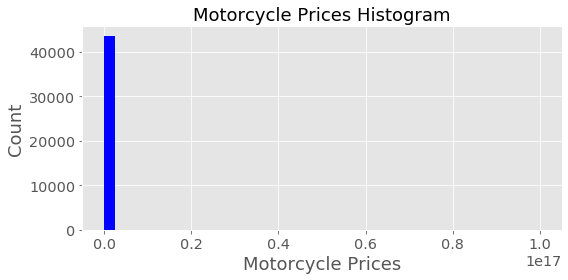

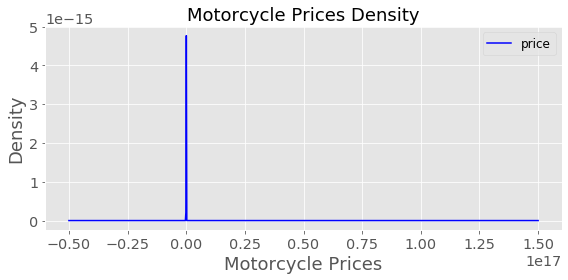

/home/eric/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/home/eric/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/home/eric/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1331: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
/home/eric/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1332: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


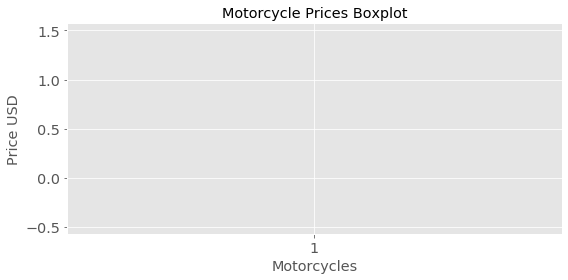

In [96]:
# Let's build some plots and view our price data with a different perspective
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (8, 4),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
plt.hist(df2['price'], color = 'blue', bins = 40)
plt.xlabel("Motorcycle Prices", fontsize=18)
plt.ylabel("Count", fontsize=18);
plt.title("Motorcycle Prices Histogram", fontsize=18);
plt.tight_layout()
plt.show()

price=df2['price'].astype(float)
price.plot.density(color ='blue')
plt.legend(fontsize=12)
plt.xlabel("Motorcycle Prices", fontsize=18)
plt.ylabel("Density", fontsize=18);
plt.title("Motorcycle Prices Density", fontsize=18);
plt.tight_layout()
plt.show()


params = {'legend.fontsize': 'x-large',
          'figure.figsize': (8, 4),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
plt.boxplot(df2['price'].array)
plt.xlabel("Motorcycles")
plt.ylabel("Price USD")
plt.title("Motorcycle Prices Boxplot")
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'years plotted by row')

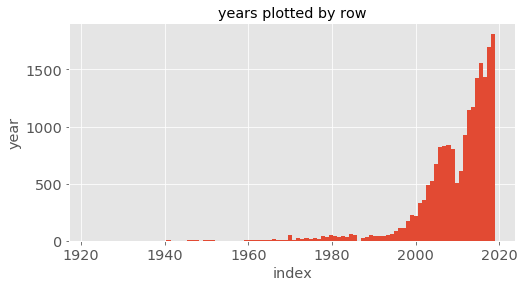

In [97]:
plt.hist(df['year'], 100)
    
plt.xlabel('index')
plt.ylabel('year')
plt.title('years plotted by row')

/home/eric/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/misc.py:80: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/home/eric/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/misc.py:81: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/home/eric/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/misc.py:71: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])


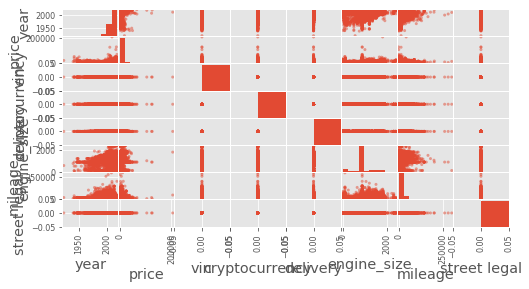

In [98]:
pd.plotting.scatter_matrix(df)
plt.show()

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19945 entries, 0 to 19944
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           19945 non-null  object 
 1   year            19945 non-null  float64
 2   price           19945 non-null  float64
 3   neighborhood    19945 non-null  object 
 4   description     19945 non-null  object 
 5   url             19945 non-null  object 
 6   model           19945 non-null  object 
 7   vin             19945 non-null  int64  
 8   condition       19945 non-null  object 
 9   cryptocurrency  19945 non-null  int64  
 10  delivery        19945 non-null  int64  
 11  engine_size     19945 non-null  float64
 12  fuel_type       19945 non-null  object 
 13  mileage         19945 non-null  float64
 14  color           19945 non-null  object 
 15  street legal    19945 non-null  int64  
 16  title status    19945 non-null  object 
 17  transmission    19945 non-null 

In [112]:
X1 = df.drop(['price', 'title', 'neighborhood', 'description', 'url', 'model', 'condition', 'fuel_type', 'color', 'title status', 'transmission', 'bike type'], axis=1).to_numpy()
y1 = df['price'].to_numpy()

In [119]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=.33, random_state=0)

rf1 = RandomForestRegressor(n_estimators=100, oob_score=True)
rf1.fit(X1_train, y1_train)
pred1 = rf1.predict(X1_test)

In [121]:
rf1.score(X1_test, y1_test), rf1.oob_score_

(0.4612866390955762, 0.4063320169462439)